In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_90 = pd.read_excel(r"C:\Users\ASYIKIN\OneDrive\Desktop\PYTHON FOR DATA ANALYSIS\PROJECTS\Population\Population table - 1970 - 2023 - Panda.xlsx", sheet_name='1990s_population (2)')

df_90.head(3)

,Year,Age,Total,Bumi,Chinese,Indian,Others,Non- Citizens,Male_Bumi,Male_Chinese,Male_Indian,Male_Others,Male_non Citizens,Female_Bumi,Female_Chinese,Female_Indian,Female_Others,Female_non Citizens
0,1991,0 - 4,2504.1,1716.4,510.8,169.9,33.1,73.9,882.8,265.0,87.0,17.1,38.5,833.6,245.9,82.9,16.0,35.4
1,1991,5 - 9,2363.5,1566.2,543.0,165.1,28.2,61.1,801.8,280.6,84.7,14.5,32.1,764.4,262.3,80.3,13.7,29.0
2,1991,10 - 14,2032.3,1272.3,536.2,156.8,23.8,43.2,648.5,276.2,79.3,12.1,22.6,623.8,260.0,77.5,11.7,20.6


In [26]:
age_bracket = df_90.pivot(index='Year', columns='Age', values='Total')

total_per_year = age_bracket.sum(axis=1).reset_index()

combined_age_total = pd.merge(total_per_year, age_bracket, on='Year')

combined_age_total.columns = ['Year','Total', ' 0 - 4', ' 10 - 14', ' 15 - 19', ' 20 - 24', ' 25 - 29', ' 30 - 34',
       ' 35 - 39', ' 40 - 44', ' 45 - 49', ' 5 - 9', ' 50 - 54', ' 55 - 59',
       ' 60 - 64', ' 65 - 69', ' 70 - 74', ' 75 - 79', ' 80 - 84', ' 85+']

re_order = ['Year', 'Total', ' 0 - 4', ' 5 - 9', ' 10 - 14', ' 15 - 19', ' 20 - 24', ' 25 - 29',
                  ' 30 - 34', ' 35 - 39', ' 40 - 44', ' 45 - 49', ' 50 - 54', ' 55 - 59',
                  ' 60 - 64', ' 65 - 69', ' 70 - 74', ' 75 - 79', ' 80 - 84', ' 85+']

combined_age_total = combined_age_total[re_order]

combined_age_total.head()

,Year,Total,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85+
0,1991,18547.1,2504.1,2363.5,2032.3,1833.4,1683.5,1622.8,1457.0,1215.1,965.6,725.2,610.9,487.0,370.9,266.1,183.5,107.9,72.7,45.6
1,1992,19067.3,2523.6,2412.2,2102.8,1887.6,1718.8,1647.7,1503.5,1272.5,1013.7,762.6,624.5,505.6,385.5,275.7,191.0,121.3,72.2,46.5
2,1993,19601.6,2555.1,2458.5,2178.4,1927.4,1756.7,1680.2,1554.1,1322.8,1071.0,799.3,643.3,525.4,400.4,287.3,194.7,124.2,72.4,50.4
3,1994,20141.7,2592.4,2495.5,2241.3,1979.2,1806.7,1706.5,1595.6,1376.6,1125.0,850.0,660.6,543.4,414.9,301.0,198.5,129.7,71.9,52.9
4,1995,20681.7,2629.2,2510.4,2313.7,2031.0,1854.5,1741.5,1633.8,1428.4,1185.9,900.7,679.9,561.7,430.2,315.7,203.7,134.9,72.0,54.5


In [27]:
print(combined_age_total.columns.get_loc('Year'))
print(combined_age_total.columns.get_loc('Total'))

0
1


# Age Bracket Distribution over time 

- Look at the noticeable decline around year 2019 - COVID!!! 🦠🦠🦠
    * Most affected - young people in thier 20s and the elders in thier 80s.

- Interesting decline of children from 0 - 4 
    * Steep fall starting from year 2000 until 2007
    * Became stagnant 2007 until 2011
    * slight increase from 2012 - 2016
    * 2016 to 2019, slight decline
    * Covid --- decline even more until now!


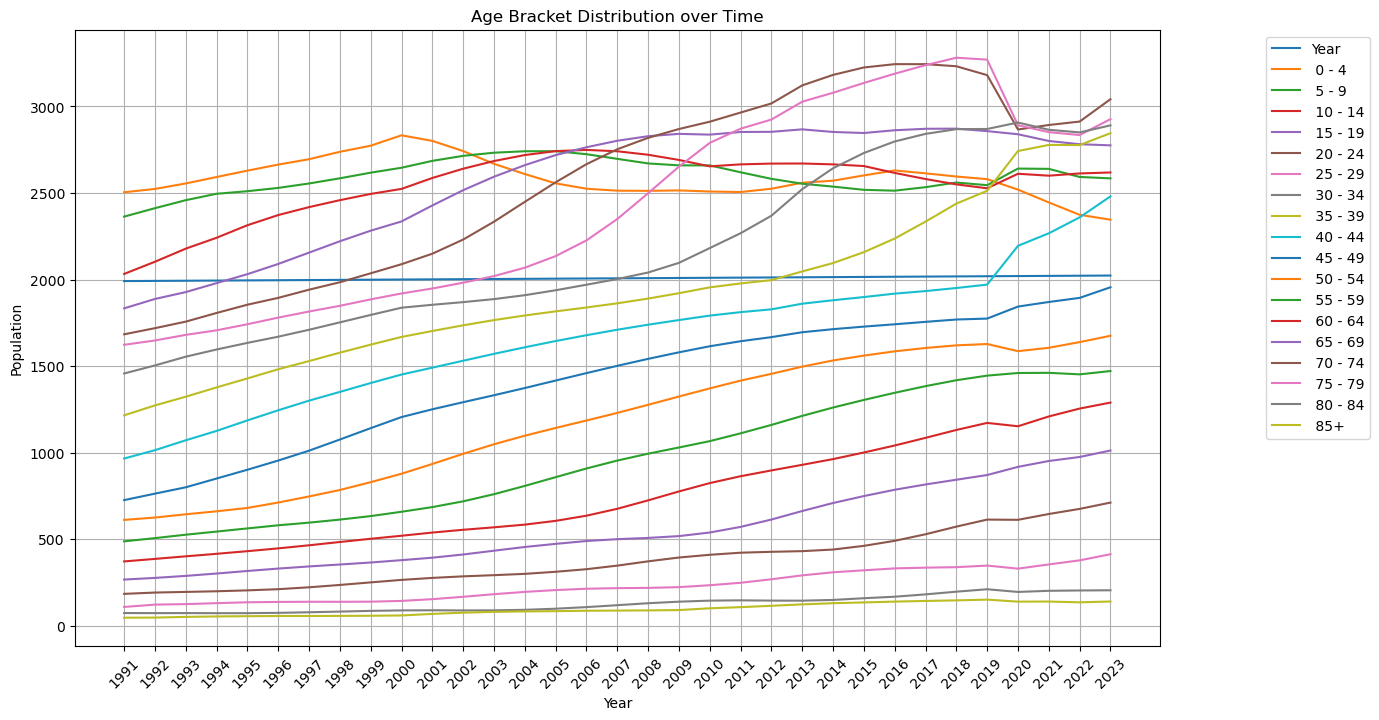

In [29]:
combined_age_total = combined_age_total.drop(columns=['Total'])

plt.figure(figsize=(14, 8))
for age_bracket in combined_age_total[1:]:
    plt.plot(combined_age_total['Year'], combined_age_total[age_bracket], label=age_bracket)
    

plt.title('Age Bracket Distribution over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(loc='best', bbox_to_anchor=(1.2, 1))
plt.grid(True)

#label each year
plt.xticks(ticks=combined_age_total['Year'], rotation=45)

plt.show()

# Stacked area chart for Age Brackets
- To visualize the proportion of each age bracket in the total population


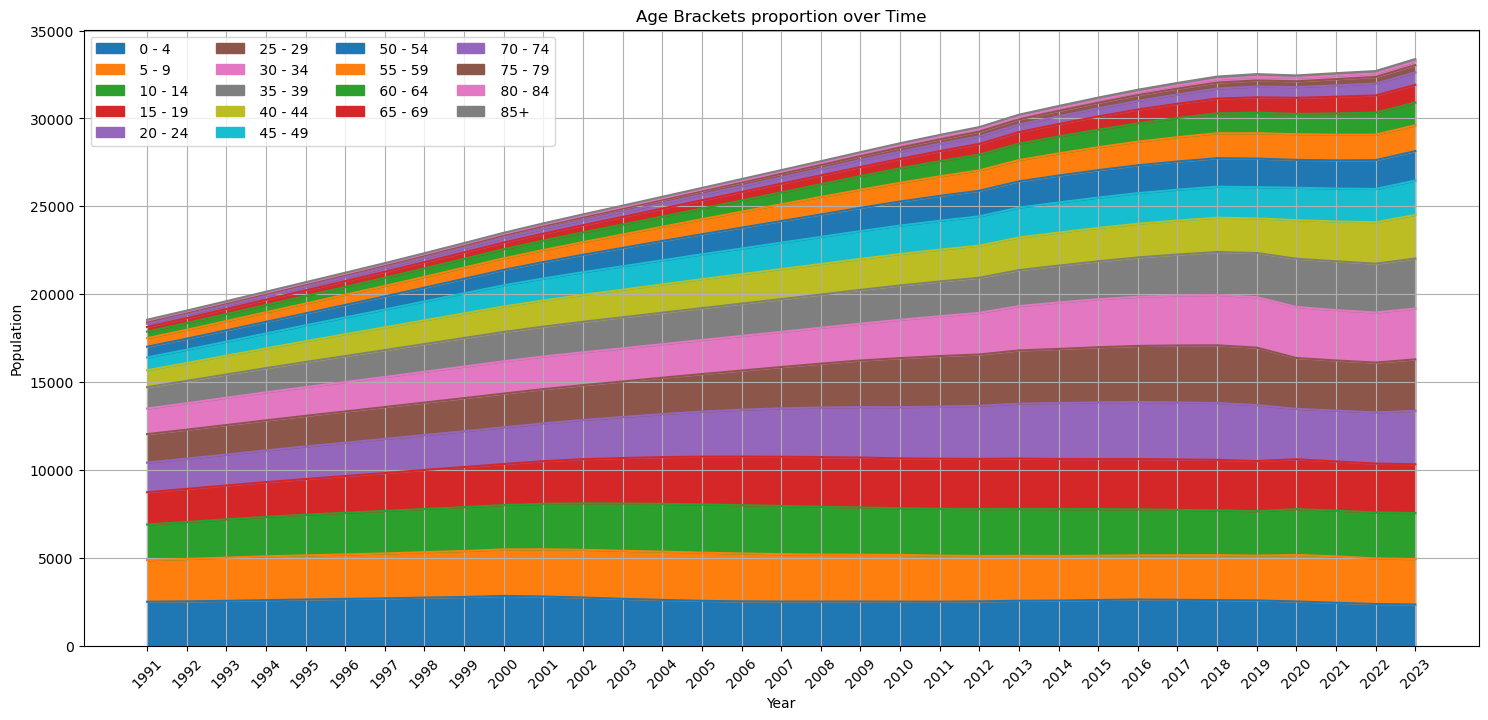

In [57]:
age_bracket_columns = [' 0 - 4', ' 5 - 9', ' 10 - 14', ' 15 - 19', ' 20 - 24', ' 25 - 29',
                  ' 30 - 34', ' 35 - 39', ' 40 - 44', ' 45 - 49', ' 50 - 54', ' 55 - 59',
                  ' 60 - 64', ' 65 - 69', ' 70 - 74', ' 75 - 79', ' 80 - 84', ' 85+']

data_for_plotting = combined_age_total.set_index('Year')[age_bracket_columns]


data_for_plotting.plot.area(stacked=True, figsize=(18,8))

plt.legend(loc='upper left', ncol=4)

plt.title('Age Brackets proportion over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)

#label each year
plt.xticks(ticks=combined_age_total['Year'], rotation=45)

plt.show()


# Correlation Heatmap 

- To understand the correlation between different age brackets


**Correlation**
- it measures the relationship between two variables

- it tells you how one variable changes with respect to each other

- the correlation coefficient ('r') ranges from -1 to 1

    * r = 1 ---> Perfect positive correlation, both variables increase

    * r = -1 ---> perfect negative correlation, one variable goes up, another down

    * r = 0 ---> no correlation (no relationship between the two variables)

**Correlation Matrix**
- it's a table that shows the correlation coefficients between many variables

**correlation heatmap**
- It takes the correlation matrix and displays it as a color-coded grid

- each cell in the grid represents the correlation between two variables

- color intensity represents the strenght of the correlation

    * darker - stronger correlation 

    * lighter - weaker correlations




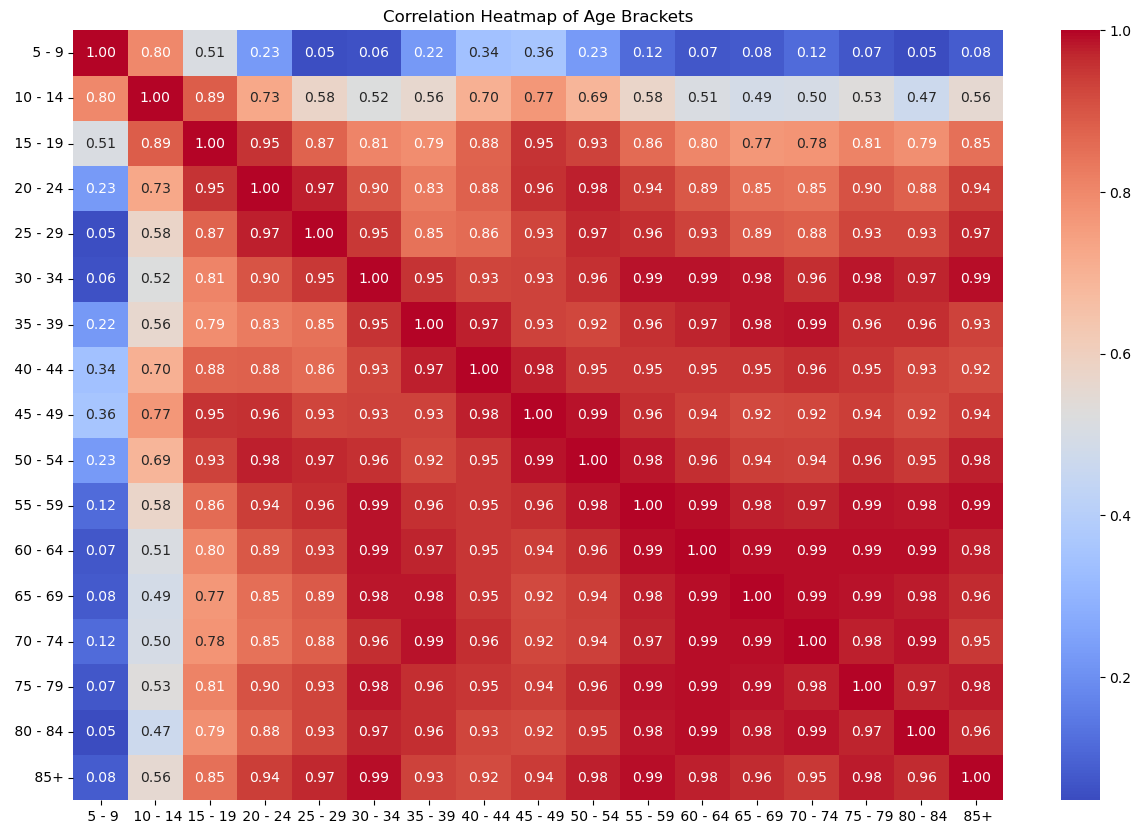

In [60]:
plt.figure(figsize=(15,10))
corr = combined_age_total[combined_age_total.columns[2:]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Age Brackets")
plt.show()

**Explanation:**

* r = 1 ---> Perfect positive correlation, both variables increase

* r = -1 ---> perfect negative correlation, one variable goes up, another down

* r = 0 ---> no correlation (no relationship between the two variables)